<a href="https://colab.research.google.com/github/MUKESH-SK/Machine-Learning-Deep-Learning-Projects/blob/main/Flower_Classification_and_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin = dataset_url,cache_dir=".",untar=True)

228813984/228813984 [==============================] - 4s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count=len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [ ]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4675532860_890504a4a3_m.jpg'),
 PosixPath('datasets/flower_photos/roses/22982871191_ec61e36939_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3208417632_19138d8e35_n.jpg'),
 PosixPath('datasets/flower_photos/roses/23891005905_17ce9e6936.jpg'),
 PosixPath('datasets/flower_photos/roses/4575042086_7674b76297_n.jpg')]

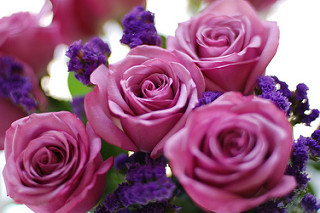

In [ ]:
PIL.Image.open(str(roses[5]))

In [ ]:
flowers_images_dict ={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict={
    'roses': 0,
    'daisy': 1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4675532860_890504a4a3_m.jpg'

In [ ]:
# converting an image into an array
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 160, 3)

In [ ]:
# making the dimension same for all image
X,y = [],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X= np.array(X)
y= np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [ ]:
X[0]

array([[[102, 111, 100],
        [ 83, 112,  76],
        [ 83,  86,  77],
        ...,
        [ 94, 177, 183],
        [105, 179, 183],
        [103, 179, 182]],

       [[ 97, 119,  71],
        [ 81,  87,  62],
        [ 76,  65,  71],
        ...,
        [ 86, 173, 180],
        [ 96, 177, 184],
        [102, 181, 188]],

       [[ 99, 119,  82],
        [ 84,  71,  67],
        [ 86,  78,  81],
        ...,
        [ 80, 172, 177],
        [ 86, 173, 181],
        [ 92, 176, 186]],

       ...,

       [[129, 174, 232],
        [128, 176, 230],
        [129, 180, 231],
        ...,
        [ 42, 109, 124],
        [ 42, 109, 124],
        [ 43, 110, 125]],

       [[121, 171, 230],
        [124, 178, 230],
        [127, 185, 231],
        ...,
        [ 43, 110, 125],
        [ 44, 111, 126],
        [ 45, 112, 127]],

       [[116, 171, 232],
        [122, 179, 232],
        [123, 184, 231],
        ...,
        [ 43, 110, 125],
        [ 44, 111, 126],
        [ 45, 112, 127]]

In [ ]:
X_train_scaled=X_train/255
X_test_scaled= X_test/255

In [ ]:
cnn = Sequential([
    layers.Conv2D(16,3,padding = "same",activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = "same",activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = "same",activation = "relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation ='relu'),
    layers.Dense(5)
])
cnn.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)
cnn.fit(X_train_scaled,y_train,epochs =15)

Epoch 1/15
86/86 [==============================] - 66s 761ms/step - loss: 1.4019 - accuracy: 0.4110
Epoch 2/15
86/86 [==============================] - 79s 925ms/step - loss: 0.9875 - accuracy: 0.6166
Epoch 3/15
86/86 [==============================] - 75s 878ms/step - loss: 0.7945 - accuracy: 0.7057
Epoch 4/15
86/86 [==============================] - 69s 807ms/step - loss: 0.6486 - accuracy: 0.7613
Epoch 5/15
86/86 [==============================] - 74s 863ms/step - loss: 0.4607 - accuracy: 0.8307
Epoch 6/15
86/86 [==============================] - 67s 784ms/step - loss: 0.2832 - accuracy: 0.9092
Epoch 7/15
86/86 [==============================] - 69s 806ms/step - loss: 0.1624 - accuracy: 0.9524
Epoch 8/15
86/86 [==============================] - 90s 1s/step - loss: 0.0914 - accuracy: 0.9753
Epoch 9/15
86/86 [==============================] - 67s 785ms/step - loss: 0.0573 - accuracy: 0.9855
Epoch 10/15
86/86 [==============================] - 77s 889ms/step - loss: 0.0409 - accuracy:

In [ ]:
cnn.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 242ms/step - loss: 2.1035 - accuracy: 0.6133


[2.103543519973755, 0.6132897734642029]

In [ ]:
predictions= cnn.predict(X_test_scaled)
predictions

29/29 [==============================] - 7s 232ms/step


In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.1971776e-09, 9.9999774e-01, 4.2278441e-07, 1.7920852e-14,
       1.8342531e-06], dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

In [ ]:
img_height = 180
img_width= 180

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
cnn = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding = "same",activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = "same",activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = "same",activation = "relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation ='relu'),
    layers.Dense(5)
])
cnn.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)
cnn.fit(X_train_scaled,y_train,epochs =15)

Epoch 1/15


86/86 [==============================] - 79s 885ms/step - loss: 1.3428 - accuracy: 0.4073
Epoch 2/15
86/86 [==============================] - 76s 881ms/step - loss: 1.0610 - accuracy: 0.5745
Epoch 3/15
86/86 [==============================] - 75s 872ms/step - loss: 0.9442 - accuracy: 0.6283
Epoch 4/15
86/86 [==============================] - 75s 874ms/step - loss: 0.8676 - accuracy: 0.6664
Epoch 5/15
86/86 [==============================] - 76s 882ms/step - loss: 0.7995 - accuracy: 0.6919
Epoch 6/15
86/86 [==============================] - 76s 880ms/step - loss: 0.7601 - accuracy: 0.7140
Epoch 7/15
86/86 [==============================] - 75s 873ms/step - loss: 0.7082 - accuracy: 0.7322
Epoch 8/15
86/86 [==============================] - 78s 910ms/step - loss: 0.6697 - accuracy: 0.7456
Epoch 9/15
86/86 [==============================] - 76s 884ms/step - loss: 0.6335 - accuracy: 0.7718
Epoch 10/15
86/86 [==============================] - 76s 881ms/step - loss: 0.5983 - accuracy: 0.7733


In [ ]:
cnn.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 223ms/step - loss: 0.9834 - accuracy: 0.6852


[0.9833586812019348, 0.6851851940155029]